### We assess the fairness of a coin based on a sample of flips outcomes. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

#define binomial probability mass function and cumulative mass function
def binomial_pmf(n, k, p):
    return comb(n, k) * p**k * (1-p)**(n-k) 

def binomial_cdf(n, k, p):
    cdf = 0
    for i in range(k+1):
        cdf += binomial_pmf(n, i, p)
    return cdf

#goal: perform statistical test to assess fairness of a coin
n_flips = 30
n_heads = 14

# null hypothesis: the coin is fair
p = 0.5
null_likelihood = binomial_pmf(n_flips, n_heads, p)
print('The probability of getting ',n_heads,' heads in',n_flips,'flips for a fair coin is: ',null_likelihood)

The probability of getting  14  heads in 30 flips for a fair coin is:  0.13543542008846998


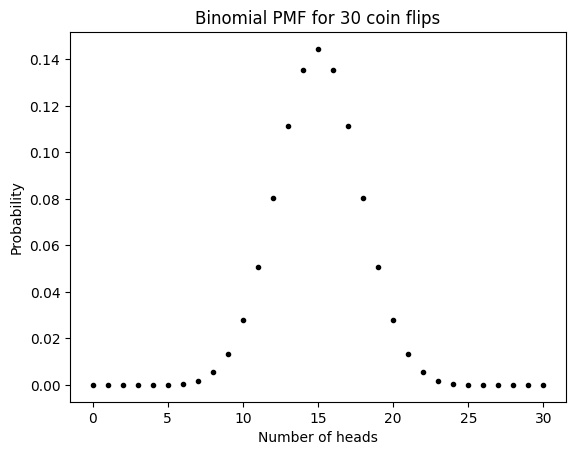

In [23]:
#make plot of pmf
x = np.arange(0, n_flips+1)
y = binomial_pmf(n_flips, x, p)
plt.plot(x, y, 'o', color='black', markersize=3)
plt.xlabel('Number of heads')
plt.ylabel('Probability') 
plt.title(f'Binomial PMF for {n_flips} coin flips')
plt.show()

In [24]:
# compute the p-value as 1 - cdf(flip_heads)
if n_heads > n_flips/2:
    p_value = 1 - min(binomial_cdf(n_flips, n_heads-1, p),1) # taking min between cdf and 1 to prevent negative p-value from numerical errors
else:   
    p_value = 1 - min(binomial_cdf(n_flips, n_flips-n_heads-1, p),1) # if less than half the flips give head, compute p-value for number of tails
print('the p-value is: ',p_value)

# reject or retain the null hypothesis based on p-value
if p_value < 0.05: # setting a 5% threshold
    print('reject null hypothesis: the coin is not fair')
else:    
    print('fail to reject null hypothesis: the coin is fair (to the best fo our knowledge)')

the p-value is:  0.427767775952816
fail to reject null hypothesis: the coin is fair (to the best fo our knowledge)
